<h3>Importamos las bibliotecas</h3>
<p>
    <ol>
        <li>Pandas</li>
        <li>Matplot</li>
        <li>Numpy</li>
        <li>Seaborn</li>
    <ol/>
</p>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<h3>Importamos nuestro Dataset</h3>
<p>
    <ol>
        <li>medical_examination</li>
    <ol/>
</p>

In [2]:
df=pd.read_csv("./Sets/medical_examination.csv")

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
#Calculamos el indice de masa corporal y creamos una columna con el valor de IMC de cada registro.
df['overweight'] = (df["weight"]/(df["height"]/100)**2)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [5]:
#Convertimos en Booleano la columna "Overweight" con .apply()

#Se puede también realizar con np.where()
df["overweight"]=df["overweight"].apply(lambda x: 1 if x > 25 else 0 )
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [6]:
#Normalizamos columna gluc y cholesterol en esta ocasión con np.where()

df["gluc"]=np.where(df["gluc"]==1,0,1)
df["cholesterol"]=np.where(df["cholesterol"]==1,0,1)

In [7]:
# "Transformamos" un DataFrame - cambiarlo de un formato ancho - muchas columnas - a un formato largo - pocas columnas pero muchas filas .melt ()
df_cat=df.melt(id_vars="cardio", value_vars=["cholesterol","gluc","smoke","alco","active","overweight"])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [8]:
# Agrupamos y damos formato a los datos para dividirlos por 'cardio'.
df_cat["total"]=1

In [9]:
df_cat=df_cat.groupby(["cardio","variable","value"], as_index=False).count()
df_cat


,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


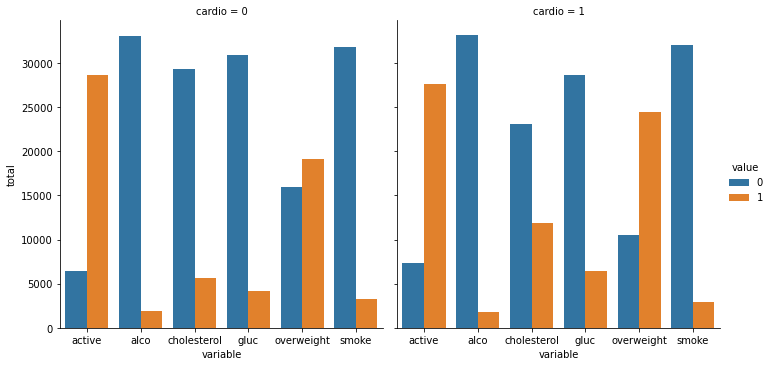

In [10]:
#Proyectamos nuestra gráfica de barras.
fig=sns.catplot(x="variable", y="total", hue="value", data=df_cat, col="cardio", kind="bar")


In [11]:
#Limpiar los datos. Filtre los siguientes segmentos de pacientes que representan datos incorrectos:
#la presión diastólica es más alta que la sistólica (mantenga los datos correctos con (df['ap_lo'] <= df['ap_hi']))
#la altura es menor que el percentil 2.5 (mantenga los datos correctos con (df['height'] >= df['height'].quantile(0.025)))
#la altura es superior al percentil 97,5
#el peso es menor que el percentil 2.5
#el peso es superior al percentil 97,5
df_heat = df[
      (df["ap_lo"]<= df["ap_hi"])&
      (df["height"]>= df["height"].quantile(0.025))&
      (df["height"]<= df["height"].quantile(0.975))&
      (df["weight"]>= df["weight"].quantile(0.025))&
      (df["weight"]<= df["weight"].quantile(0.975))]

In [12]:
#Creamos la correlación entre las columnas con el método "pearson"
corr = df_heat.corr(method="pearson")

In [13]:
#Creamos una máscara del triángulo superior de la correlación 
mask = np.triu(corr)


<AxesSubplot:>

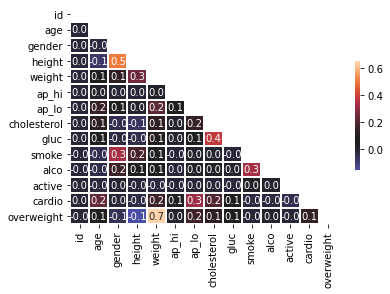

In [14]:
#Proyectamos nuestro Heatmap 
sns.heatmap(corr, linewidths=1, annot=True, mask=mask,fmt=".1f",center=0.08, cbar_kws={"shrink":0.5})